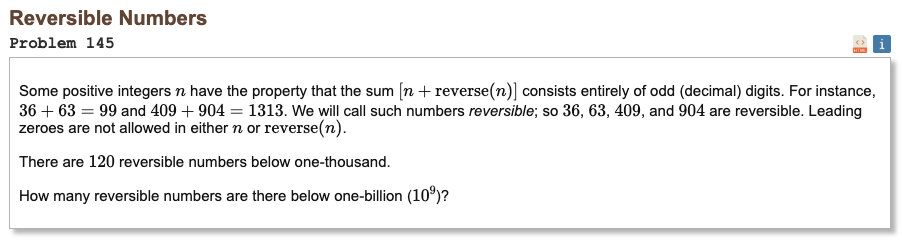

* we need n where n plus its reverse has only odd digits
* odd length numbers never work because the middle digit would force an even sum
* so count only even lengths 2 4 6 8 under one billion
* do digit dynamic programming on mirrored pairs from the center outward
* track a carry coming from inner pairs and require each pair sum is odd
* compute transitions for inner pairs with free digits 0 1 2 … 9
* for the outermost pair forbid leading zeros on both ends
* require the final carry to be zero and add counts for lengths 2 4 6 8

In [1]:
import math

def count_pairs(c_in, outer=False):
    digits_a = range(1, 10) if outer else range(10)
    digits_b = range(1, 10) if outer else range(10)
    c0 = c1 = 0
    for a in digits_a:
        for b in digits_b:
            s = a + b + c_in
            if s % 2 == 1:
                if s >= 10:
                    c1 += 1
                else:
                    c0 += 1
    return c0, c1

def count_length_even(L):
    m = L // 2
    inner_c0_cin0, inner_c1_cin0 = count_pairs(0, outer=False)
    inner_c0_cin1, inner_c1_cin1 = count_pairs(1, outer=False)
    outer_c0_cin0, outer_c1_cin0 = count_pairs(0, outer=True)
    outer_c0_cin1, outer_c1_cin1 = count_pairs(1, outer=True)

    dp0 = {0: 1}
    for _ in range(m - 1):
        ndp = {0: 0, 1: 0}
        ndp[0] += dp0.get(0, 0) * inner_c0_cin0
        ndp[1] += dp0.get(0, 0) * inner_c1_cin0
        ndp[0] += dp0.get(1, 0) * inner_c0_cin1
        ndp[1] += dp0.get(1, 0) * inner_c1_cin1
        dp0 = ndp

    ans = 0
    ans += dp0.get(0, 0) * outer_c0_cin0
    ans += dp0.get(1, 0) * outer_c0_cin1
    return ans

def solve(limit=10**9):
    total = 0
    for L in [2, 4, 6, 8]:
        total += count_length_even(L)
    return total

result = solve()
print("Result:", result)

Result: 2324540
